In [74]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [75]:
# Variables to tweak for data creation
np.random.seed(3215)
sample_size = 100

In [76]:
# Read data into environment
# See name_data_explaination for data collection methods
# AIAN - American Indian or Alaskan Native
# API - Asian Pacific Islander
last_names = pd.read_csv('data/common_surnames_census_2000.csv').rename(columns={'pct2prace': 'pctmixed'})
first_names = pd.read_csv('data/ssa_names_db.csv')

In [77]:
# Data preprocessing for Last Names

# Fields suppressed for confidentiality are assigned the value (S). 
# Replace confidentiality value with 0
# Prevents conflicts when finding max(percentages)
last_names2 = last_names.replace('(S)', 0.00)

# Convert percentage columns from strings to floats
for column in last_names2.columns[1:]:
    if last_names2[column].dtype == 'object':
        last_names2[column] = last_names2[column].astype(float)

# Create new column based on the ethnicity label with highest probability
last_names2['predominant'] = last_names2.iloc[:,5:].idxmax(1).str.replace('pct', '')

# Sample evenly through each unique dominant ethnicity
# Prevents most names being white and promotes even representation
last_names_final = last_names2.groupby('predominant').apply(lambda ethnicity: ethnicity.sample(sample_size)).reset_index(drop=True)

In [78]:
last_names_final

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pctmixed,pcthispanic,predominant
0,PARISIEN,34114,629,0.23,79693.57,36.57,8.43,0.00,47.22,6.20,0.00,aian
1,CHARLEY,8314,3665,1.36,66009.77,19.43,16.29,1.83,59.07,2.16,1.23,aian
2,GREYEYES,79958,221,0.08,85867.28,0.00,0.00,0.00,91.40,4.07,3.17,aian
3,WHITEBIRD,69854,262,0.10,84975.51,17.18,0.00,0.00,72.90,7.63,1.91,aian
4,DUMARCE,94676,179,0.07,86953.23,5.59,0.00,0.00,84.92,3.35,4.47,aian
...,...,...,...,...,...,...,...,...,...,...,...,...
595,CHENOWITH,77222,231,0.09,85632.58,96.97,0.00,0.00,0.00,0.00,0.00,white
596,CRISP,2640,12581,4.66,52348.17,83.79,12.07,0.37,0.59,1.70,1.48,white
597,CLORAN,68782,267,0.10,84855.52,99.63,0.00,0.00,0.00,0.00,0.00,white
598,SAGO,28730,780,0.29,78296.31,46.92,39.74,1.41,6.41,1.92,3.59,white


In [79]:
# Potential other way of handling confidentiality
# 27,649 Names after removal
'''
t = last_names.replace('(S)', None)
t.dropna()
'''

"\nt = last_names.replace('(S)', None)\nt.dropna()\n"

In [80]:
# Data preprocessing for First Names
# Multiply sample_size by 3 to keep same dimension as Last Names
# 6 Ethnicities / 2 Genders
first_names_final = first_names.groupby('gender').apply(lambda gender: gender.sample(sample_size*3)).reset_index(drop=True)

In [81]:
# Creating Full Names dataset
# Extract relevant features from First and Last Name datasets
fnames = first_names_final.iloc[:,0]
lnames = last_names_final.iloc[:,0].str.capitalize()
ffeatures = first_names_final.iloc[:,1]
lfeatures = last_names_final.iloc[:,5:]
# Join all features together in final dataset
full_names = pd.concat([fnames,lnames,lfeatures,ffeatures], axis= 1)
full_names.columns = ['first', 'last', 'pctwhite', 'pctblack', 'pctapi', 'pctaian', 'pctmixed',
       'pcthispanic', 'predominant', 'gender']
# Make names into list for ChatGPT data collection
names = [row for row in full_names[['first', 'last']].to_numpy()]

In [82]:
'''ChatGPT Response Generating Code
    Data saved in CSV file for future use'''

# import openai

# openai.api_key = open('/Users/tuomasr/Library/Mobile Documents/com~apple~CloudDocs/School/ECS/ECS 171/Group Proj/key/Group_13_Project_Key.txt').read().strip('\n')

# reply_content = []
# for person in names:
#     name = ' '.join(person)
#     text = f'Pretend you are a professor for at a popular university. You are asked by one of your students ({name}) if you can write them a letter of recommendation. Make up any information about them you feel is relevant to convey their abilities. Choose a field of study you believe is most fitting for them. Please do not include the heading'
#     completion = openai.ChatCompletion.create(
#         model="gpt-3.5-turbo", # this is "ChatGPT" $0.002 per 1k tokens
#         messages=[{"role": "user", "content": text}]
#     )

#     reply_content.append(completion.choices[0].message.content)

# # pd.DataFrame(reply_content).to_csv('chatGPT_response')

'ChatGPT Response Generating Code\n    Data saved in CSV file for future use'

In [83]:
# Add letters of Rec to the database
responses = pd.read_csv('chatGPT_responses')
full_names['GPT_letters'] = responses.iloc[:,1]
print(full_names['GPT_letters'])

0      Dear Admissions Committee,\n\nIt is my pleasur...
1      Dear Mr./Ms. Charley,\n\nI am thrilled to writ...
2      and greeting of the letter in your response.\n...
3      November 1, 2021\n\nDear Admission Committee,\...
4      Dear Admissions Committee,\n\nI am writing thi...
                             ...                        
595    To Whom It May Concern\n\nI am writing this le...
596    Dear Admissions Committee,\n\nI am writing thi...
597    Dear Admissions Committee,\n\nI am writing to ...
598    and date of the letter.\n\nDear Admissions Com...
599    To Whom It May Concern,\n\nI am writing this l...
Name: GPT_letters, Length: 600, dtype: object


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = full_names['GPT_letters'].copy()

# process data with tf-idf and exclude common stopwords
term_vectorizer = TfidfVectorizer(stop_words='english')
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
trigram_vectorizer = TfidfVectorizer(ngram_range=(3, 3), stop_words='english')

term_scores = term_vectorizer.fit_transform(documents).toarray()
bigram_scores = bigram_vectorizer.fit_transform(documents).toarray()
trigram_scores = trigram_vectorizer.fit_transform(documents).toarray()

# associate term scores with race and gender table
terms = term_vectorizer.get_feature_names_out()
term_tab = pd.DataFrame(term_scores, columns=terms)
term_tab.insert(0, 'Race', full_names['predominant'])
term_tab.insert(1, 'Gender', full_names['gender'])

# associate term scores with race and gender table
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_tab = pd.DataFrame(bigram_scores, columns=bigrams)
bigram_tab.insert(0, 'Race', full_names['predominant'])
bigram_tab.insert(1, 'Gender', full_names['gender'])

# associate term scores with race and gender table
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_tab = pd.DataFrame(trigram_scores, columns=trigrams)
trigram_tab.insert(0, 'Race', full_names['predominant'])
trigram_tab.insert(1, 'Gender', full_names['gender'])

# display(term_tab)
# display(bigram_tab)
# display(trigram_tab)

In [85]:
def group_race_gender(tab):
    tab_C = tab.copy().drop(columns = ["Race", "Gender"])

    # the scores for all race and gender
    whole_grouped = tab_C.sum(axis=0).to_dict()

    # group scores by race
    grouped = tab.groupby('Race')
    race_grouped = {}
    for race, group in grouped:
        group = group.drop(columns = ["Race", "Gender"])
        freq = (group.sum(axis=0) / tab_C.sum(axis=0)) * 100
        race_grouped[race] = freq.to_dict()

    # group scores by gender
    grouped = tab.groupby('Gender')
    gender_grouped = {}
    for gender, group in grouped:
        group = group.drop(columns = ["Race", "Gender"])
        freq = (group.sum(axis=0) / tab_C.sum(axis=0)) * 100
        gender_grouped[gender] = freq.to_dict()

    return race_grouped, gender_grouped, whole_grouped

In [86]:
# processed groups 
term_race_grouped, term_gender_grouped, term_whole_grouped = group_race_gender(term_tab)
bigram_race_grouped, bigram_gender_grouped, bigram_whole_grouped = group_race_gender(bigram_tab)
trigram_race_grouped, trigram_gender_grouped, trigram_whole_grouped = group_race_gender(trigram_tab)

In [87]:
def inverseBar(whole_scores, grouped_scores, n):
    # sort scores 
    sorted_scores = dict(sorted(whole_scores.items(), key=lambda x: x[1], reverse=True))

    # Extract the races and top n features
    groups = list(grouped_scores.keys())
    top_terms = list(sorted_scores.keys())[:n][::-1]
    
    # Set up the figure and axis
    fig, ax = plt.subplots()
    
    # Set up for label and color
    group_colors = dict(zip(groups, ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'yellow']))

    # create stacked horizontal bar for each term
    for term in top_terms:
        top_freq_group = {}
        for group in groups:
            top_freq_group[group] = grouped_scores[group][term]
            
        # sort the groups by higest to lowest term frequency
        sorted_freq_group = dict(sorted(top_freq_group.items(), key=lambda x: x[1], reverse=True))

        for group, freq in sorted_freq_group.items():
            # Get the color for the current group
            color = group_colors[group]

            ax.barh([term], [freq], height=0.8, color=color, label=group)

    # Set the title and labels
    plt.title('Top 20 Terms From Chatgpt\'s response')
    plt.xlabel('Frequency %')
    plt.ylabel('Terms')

    # Create a legend for the race colors
    legend_labels = list(group_colors.keys())
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=group_colors[group]) for group in legend_labels]
    plt.legend(legend_handles, legend_labels)

    plt.show()


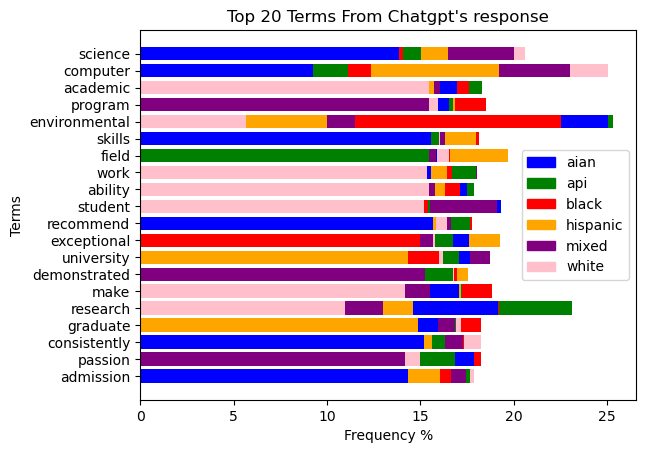

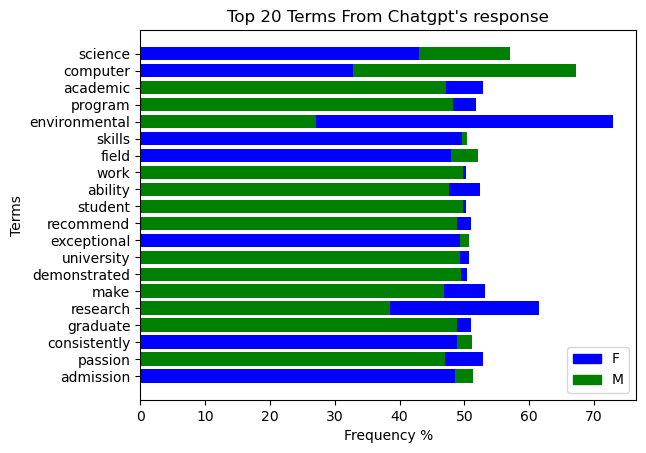

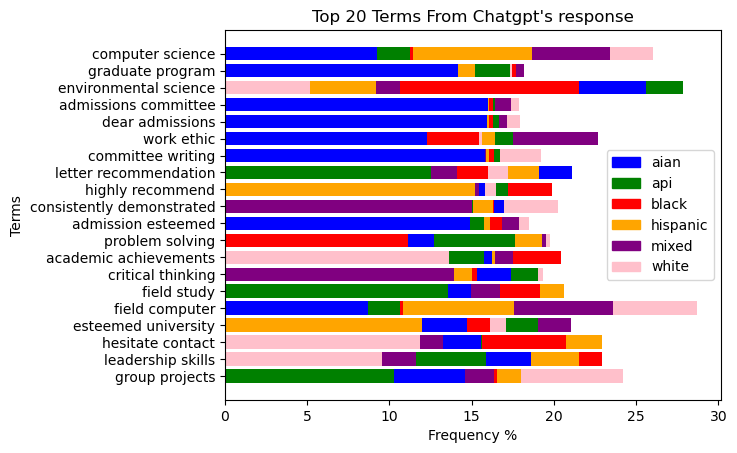

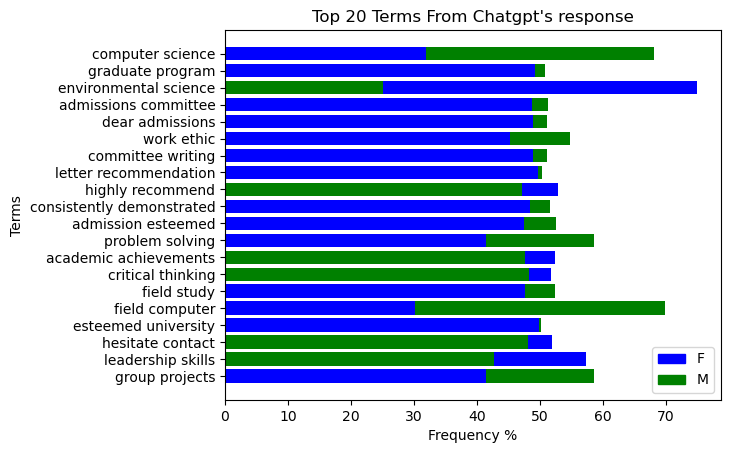

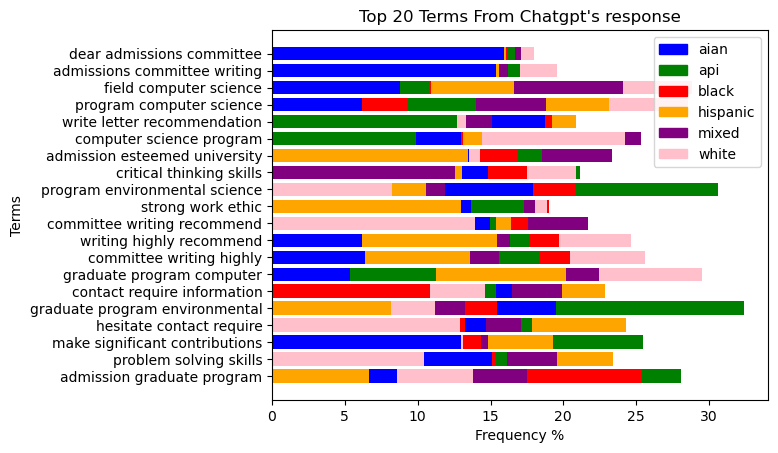

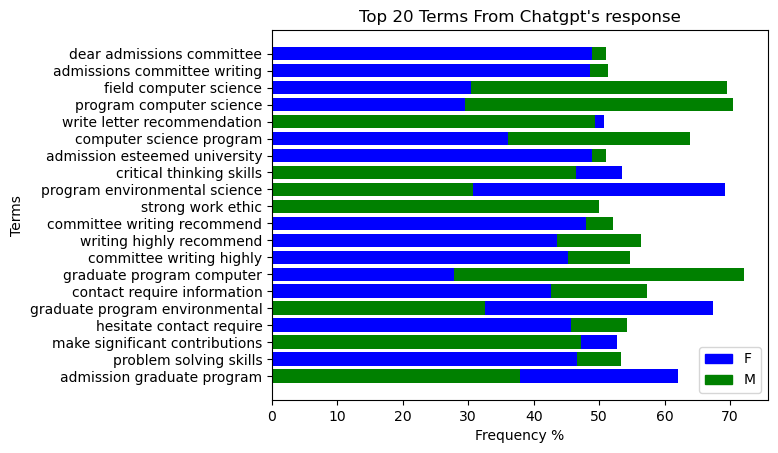

In [88]:
# Iterate over each race and create bar graphs
inverseBar(term_whole_grouped, term_race_grouped, 20)
inverseBar(term_whole_grouped, term_gender_grouped, 20)
inverseBar(bigram_whole_grouped, bigram_race_grouped, 20)
inverseBar(bigram_whole_grouped, bigram_gender_grouped, 20)
inverseBar(trigram_whole_grouped, trigram_race_grouped, 20)
inverseBar(trigram_whole_grouped, trigram_gender_grouped, 20)

In [89]:
grouped = term_tab.groupby('Race')
race_grouped = {}
for race, group in grouped:
    group = group.drop(columns = ["Race", "Gender"])
    race_grouped[race] = group.sum().to_dict()

# group scores by gender
grouped = term_tab.groupby('Gender')
gender_grouped = {}
for gender, group in grouped:
    group = group.drop(columns = ["Race", "Gender"])
    gender_grouped[gender] = group.sum().to_dict()

aian :


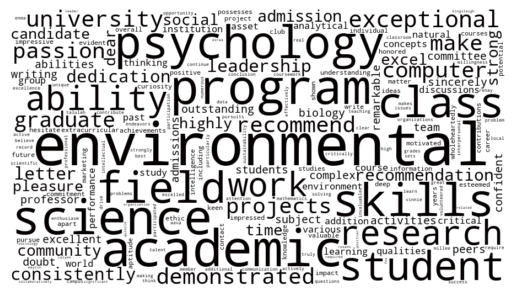

api :


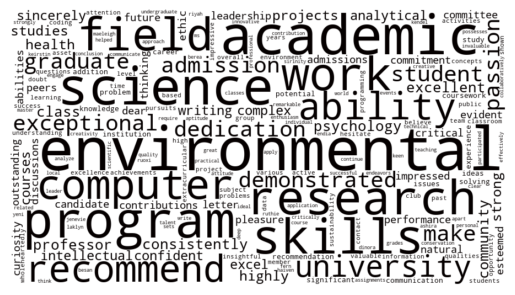

black :


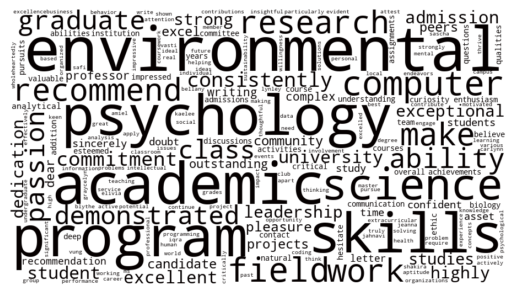

hispanic :


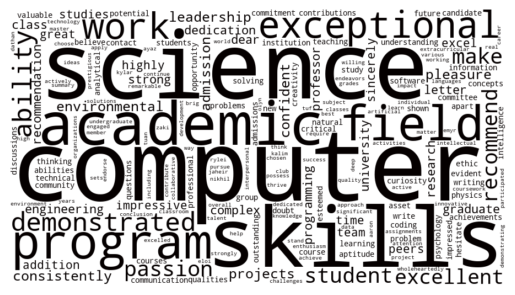

mixed :


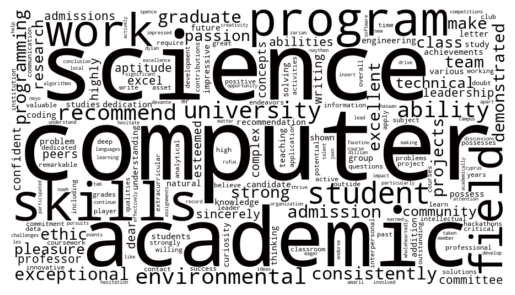

white :


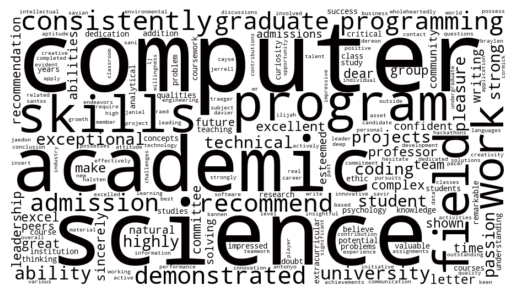

F :


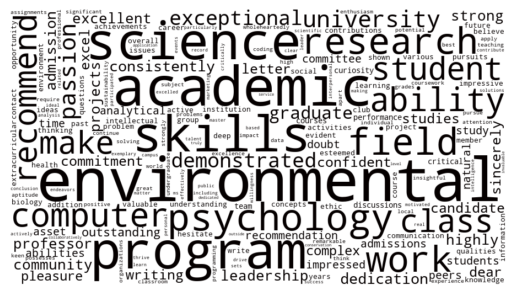

M :


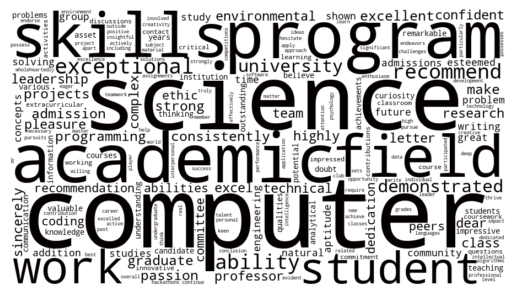

In [90]:
'''Word Cloud visualization tried, but decided on other methods that gave more detailed information'''
def wordCloudGen(scores):
    # change the value to black
    def black_color (word, font_size, position, orientation, random_state = None, **kwargs):
        return ("hsl(0, 100%, 1%)")

    # set the background color to white
    # word cloud for the fisrt person "Baeley Parisien"
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color = "white", 
                          width = 900, 
                          height = 500).generate_from_frequencies(scores)

    # set the word color to black
    wordcloud.recolor(color_func = black_color)

    # set the figsize
    # plt.figure(figsize = [15, 10])

    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()


# generate word cloud for each race
for race, scores in race_grouped.items():
    print(race, ':')
    wordCloudGen(scores)

# generate world cloud for each 
for gender, scores in gender_grouped.items():
    print(gender, ':')
    wordCloudGen(scores)

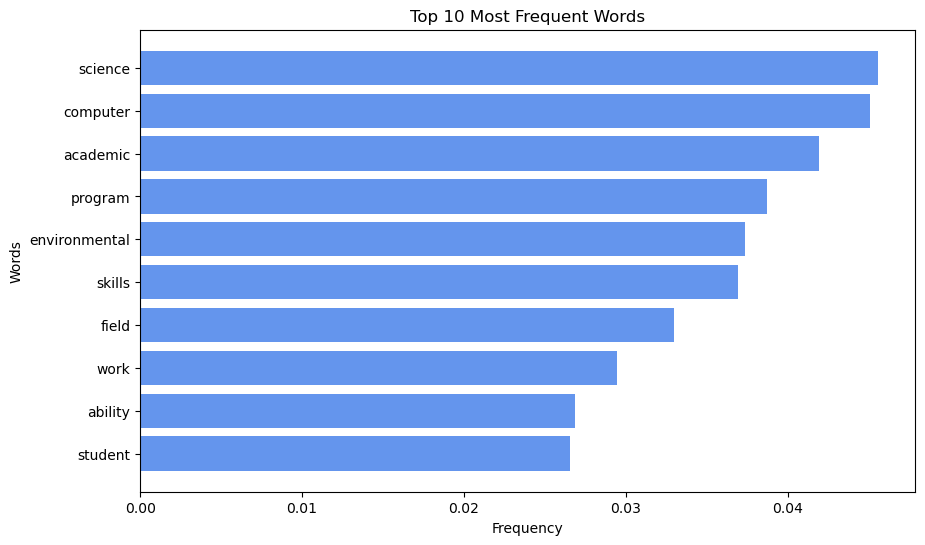

In [91]:
# Select the columns for the word scores
word_scores = term_tab.drop(columns=['Race', 'Gender'])

# Calculate the mean frequency of each word across all names
mean_scores = word_scores.mean()

# Sort the mean scores in descending order and select the top 10 words
top_words = mean_scores.sort_values(ascending=False)[:10]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_words.index, top_words.values, color='cornflowerblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert the y-axis to show highest words at the top
plt.show()


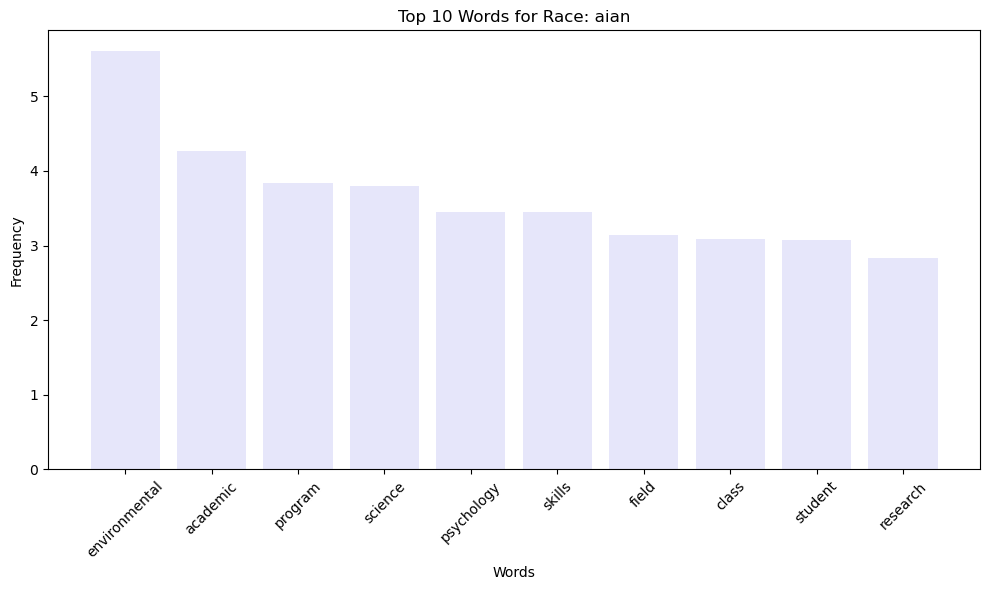

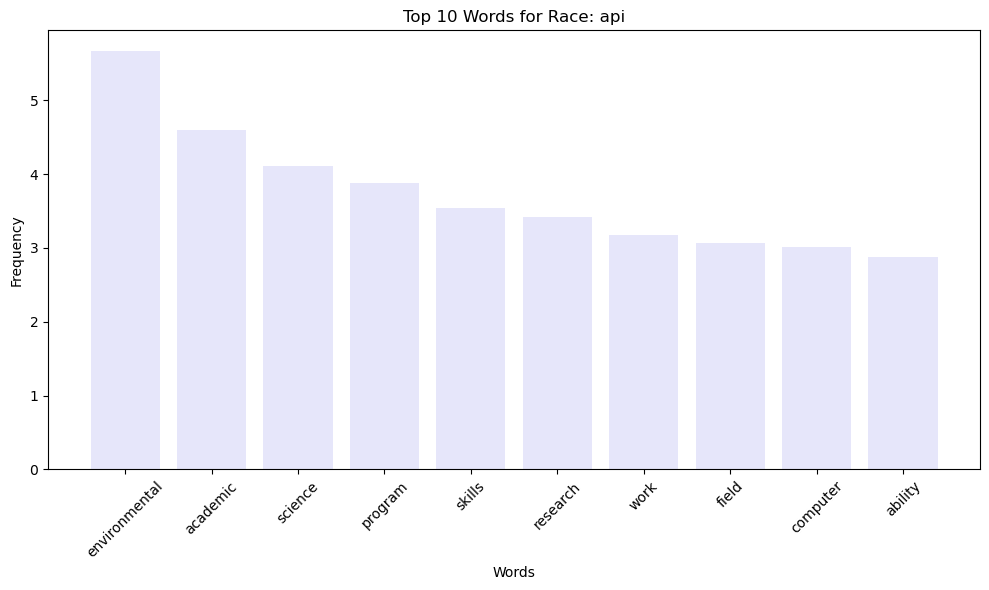

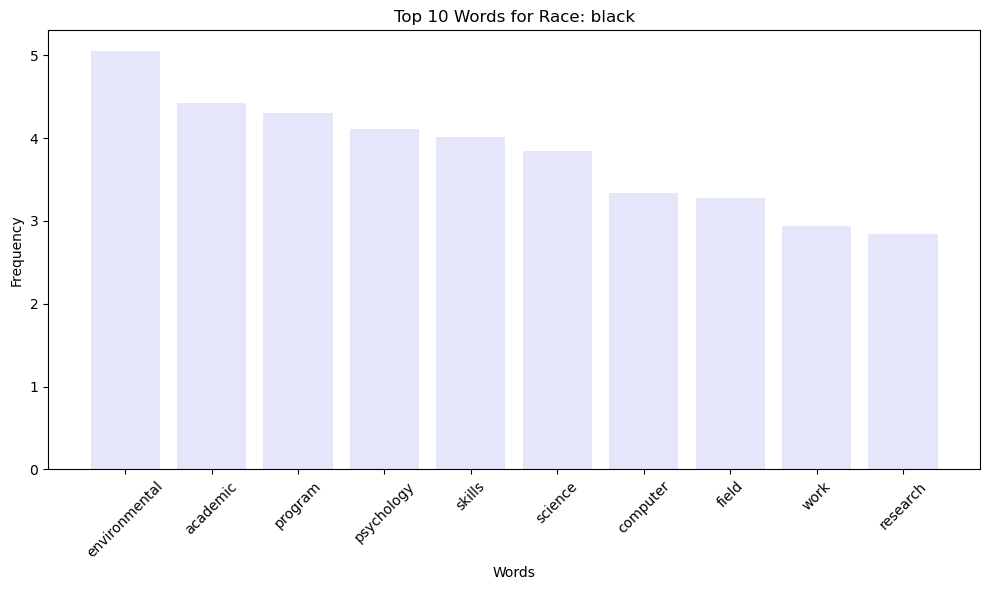

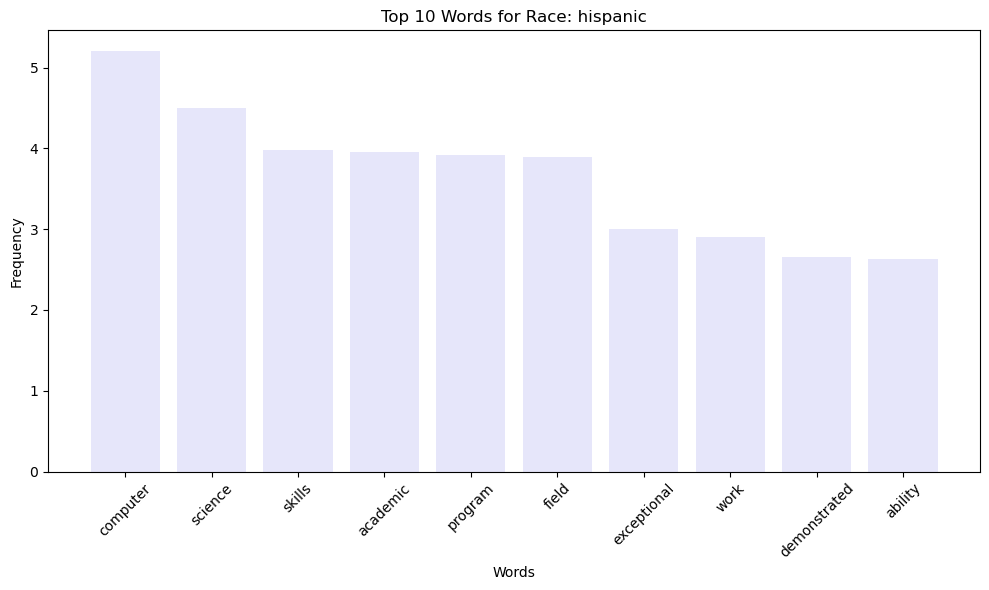

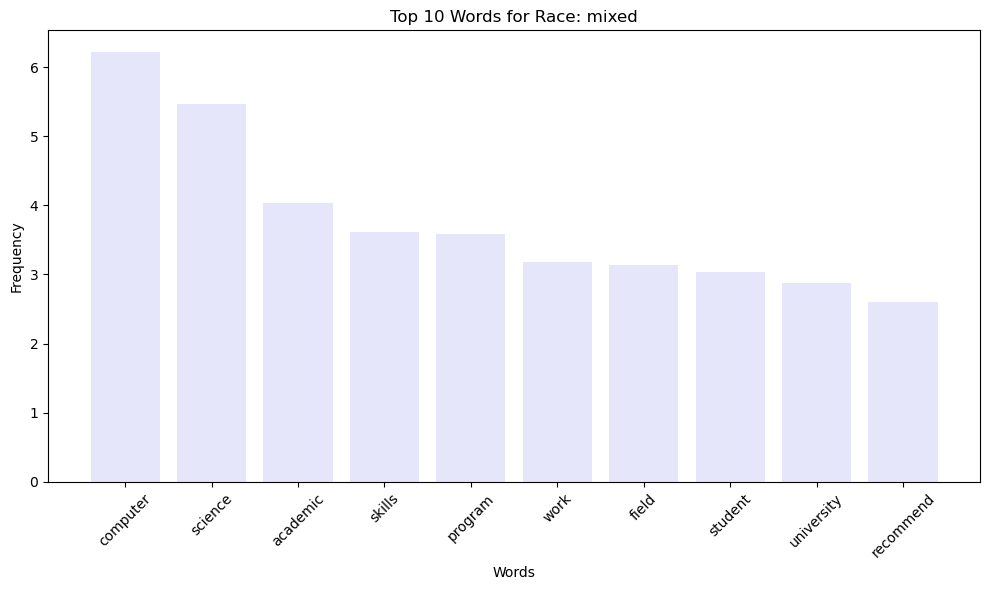

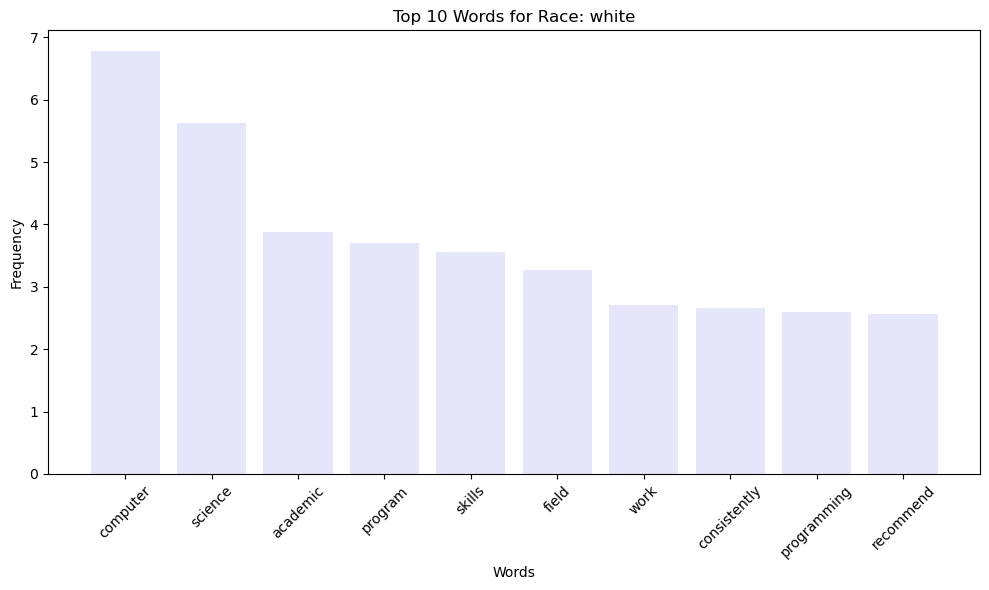

In [92]:
# Get the top 10 most frequent words for each race
top_words_per_race = {}
for race, scores in race_grouped.items():
    top_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_race[race] = top_words

# Create a bar graph for each race
for race, top_words in top_words_per_race.items():
    # Extract the word and score information
    words, scores = zip(*top_words)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(words, scores, color='lavender')
    plt.title(f"Top 10 Words for Race: {race}")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

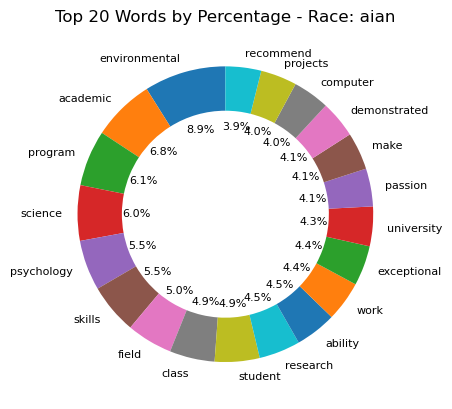

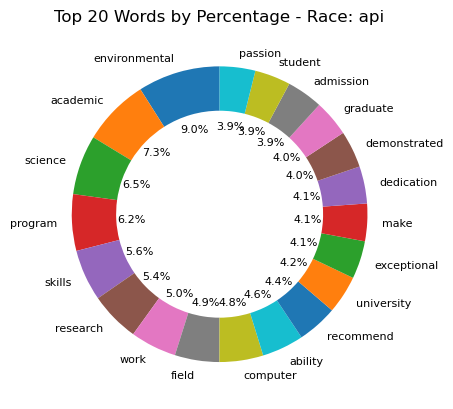

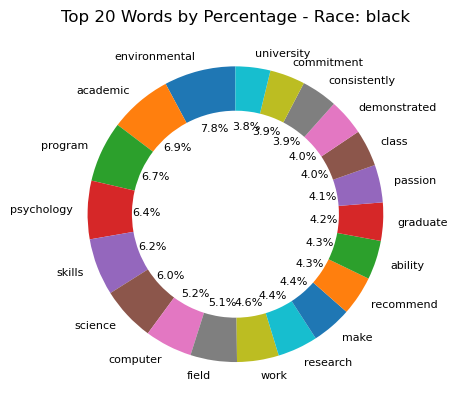

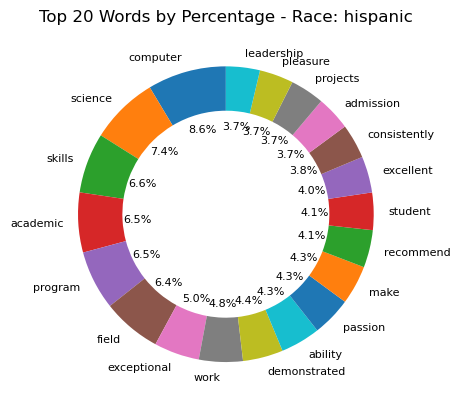

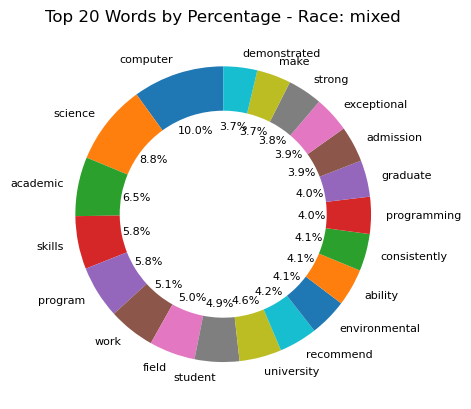

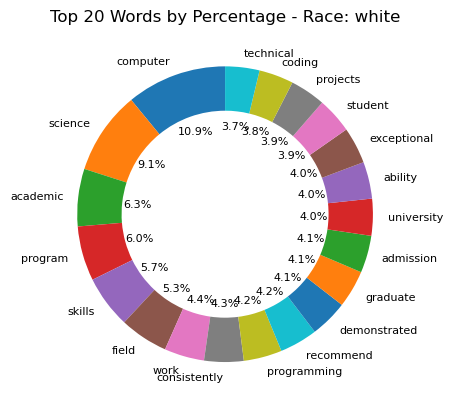

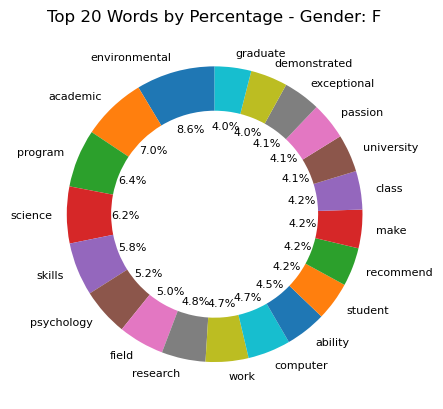

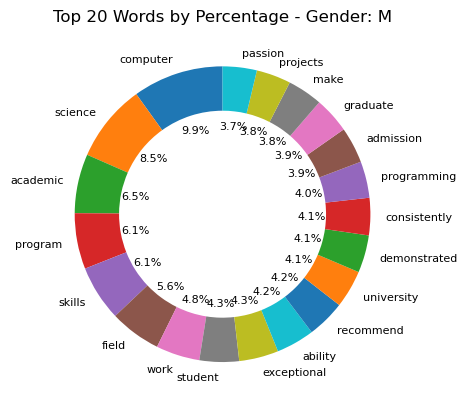

In [93]:
# Define a function to plot the donut graph
def plot_donut_graph(data, title):
    # Sort the data by values in descending order
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

    # Select the top 20 words and their corresponding percentages
    top_words = [x[0] for x in sorted_data[:20]]
    percentages = [x[1] for x in sorted_data[:20]]

    # Create the donut graph
    fig, ax = plt.subplots()

    wedges, text, _ = ax.pie(
        percentages,
        labels=top_words,
        startangle=90,
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%',  # Include percentages as labels
        textprops={'fontsize': 8}  # Set font size for percentages
    )

    ax.set_aspect('equal')
    ax.set_title(title)

    plt.show()

# Plot donut graph for each race
for race, data in race_grouped.items():
    plot_donut_graph(data, f"Top 20 Words by Percentage - Race: {race}")

# Plot donut graph for each gender
for gender, data in gender_grouped.items():
    plot_donut_graph(data, f"Top 20 Words by Percentage - Gender: {gender}")